In [1]:
import sys
sys.path.append('reflutils')
import reflutils as ru
import numpy as np
from pathlib import Path

%matplotlib inline
from pypxr.structure import *
from pypxr.reflectivity import *
import matplotlib.pyplot as plt
import seaborn as sns
from refnx.dataset import ReflectDataset
from refnx.analysis import Transform, CurveFitter, Objective, GlobalObjective
from refnx._lib.emcee.moves.de import *
import pandas as pd
import pickle
import periodictable.xsf as xsf
sns.set_style("darkgrid")

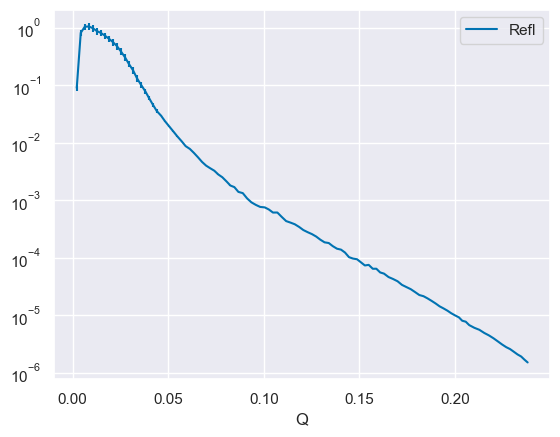

In [12]:
ru.Refl().plot()

In [4]:
def hdh_path():
    path = (
        Path.home()
        / "Washington State University (email.wsu.edu)"
        / "Carbon Lab Research Group - Documents"
    )
    hdh_path = path / next(path.glob("*Harlan Heilman*"))
    csv = hdh_path / "Harlan Heilman" / ".refl" / ".csv"
    return csv


d_path = hdh_path()

data = {}
for refl in list(d_path.glob("*.csv")):
    sliced_name = refl.stem.split("_")


    sample_name = sliced_name[0]


    sample_energy = sliced_name[1]


    if len(sliced_name) > 2:
        sample_pol = sliced_name[2]


    else:
        sample_pol = "100"


    if sample_name not in data:
        data[sample_name] = {sample_energy: {sample_pol: pd.read_csv(refl)}}


    else:
        data[sample_name] |= {sample_energy: {sample_pol: pd.read_csv(refl)}}



def ensure_nromalized(refl):
    refl.Refl = refl.Refl / refl.Refl.iloc[0]


    return refl



def to_refnx_dataset(refl, restat=False):
    refl = ensure_nromalized(refl)


    if restat:
        data = (refl.Q, refl.Refl, refl.Refl * 0.1)


    else:
        data = (refl.Q, refl.Refl, refl.Err)


    return ReflectDataset(data)



# bareSi_250_dataset = to_refnx_dataset(bareSi_250)


# bareSi_320_dataset = to_refnx_dataset(bareSi_320)



# fig, ax = plt.subplots()


# bareSi_250_dataset.plot(fig=fig)


# bareSi_320_dataset.plot(fig=fig)


# ax.set(yscale="log", xlim=(0.005, 0.3), xlabel="Q (1/Angstrom)", ylabel="Reflectivity")


# fig.set(dpi=300)

In [5]:
data["ZnPc"]

KeyError: 'ZnPc'

Error plotting PS-Bad 272.0 100: list index out of range
Error plotting PS-Bad 250.0 100: list index out of range
Error plotting PS-Bad 250.0 100: list index out of range
Error plotting PS-Bad 250.0 100: list index out of range
Error plotting PS-Film 285.0 100: list index out of range
Error plotting PS-Film 280.0 100: list index out of range
Error plotting PS-Film 283.0 100: list index out of range
Error plotting ZnPc 284.0 190: list index out of range


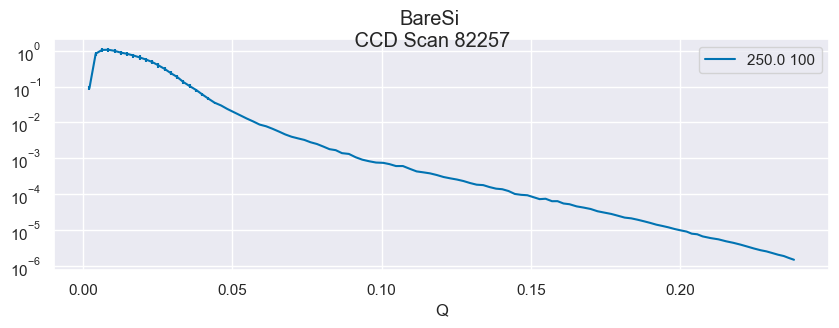

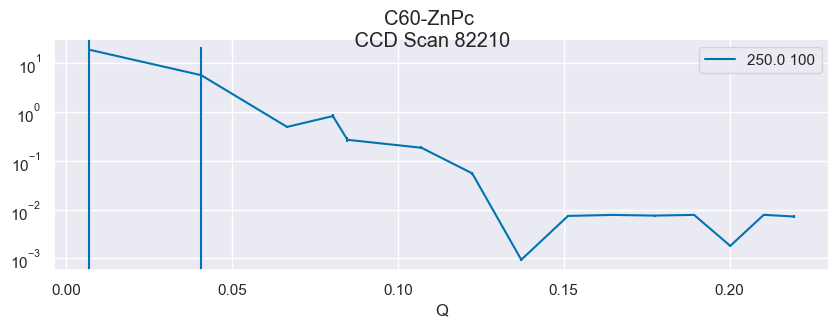

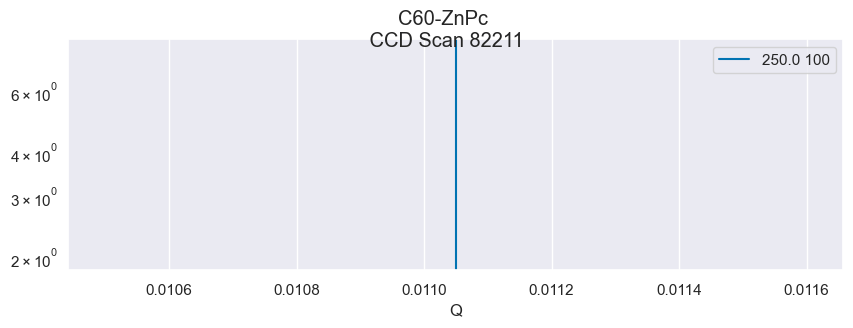

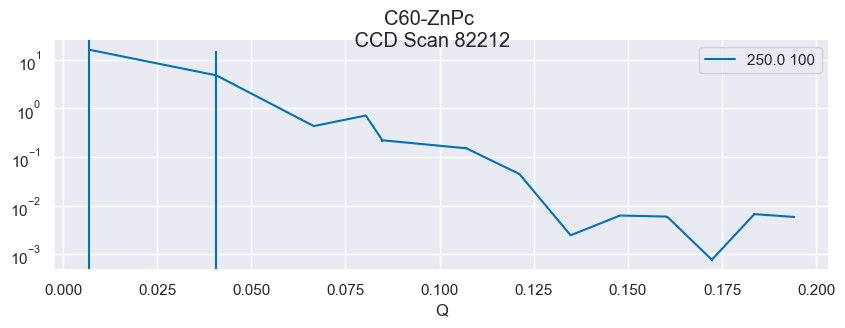

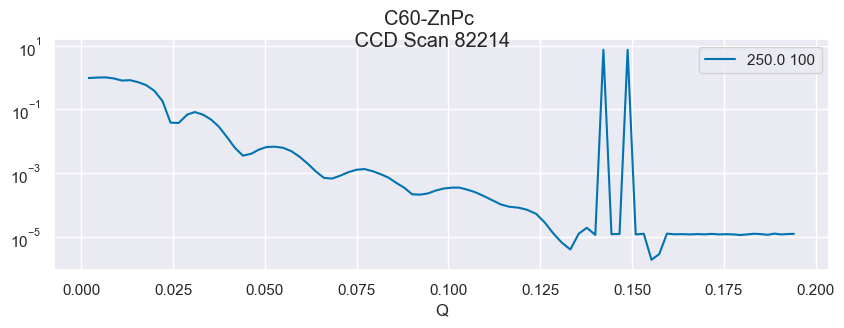

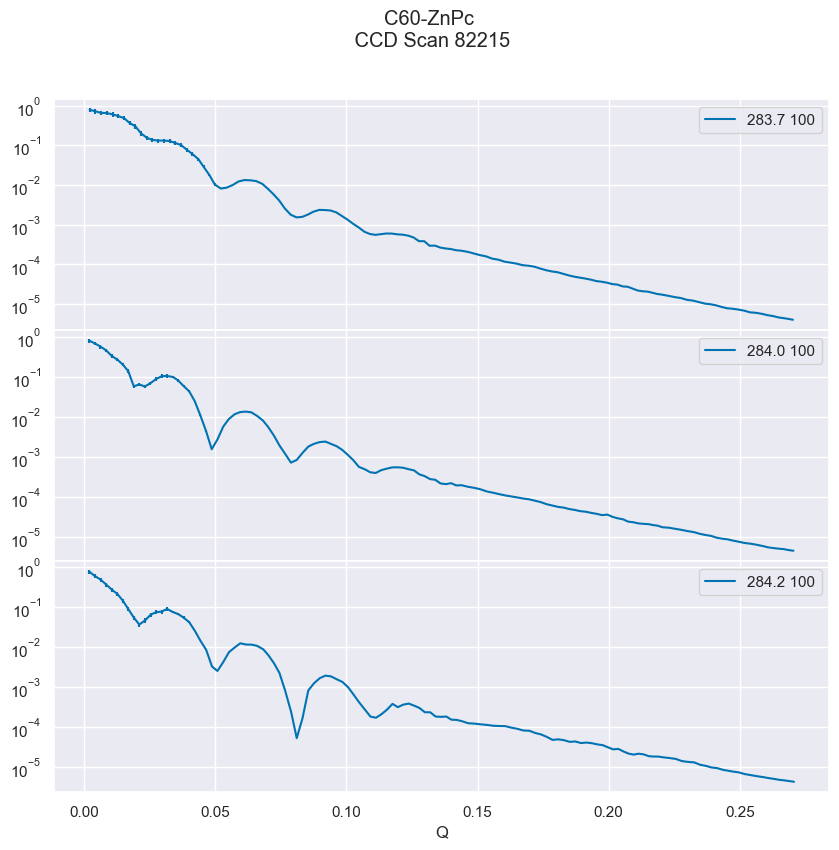

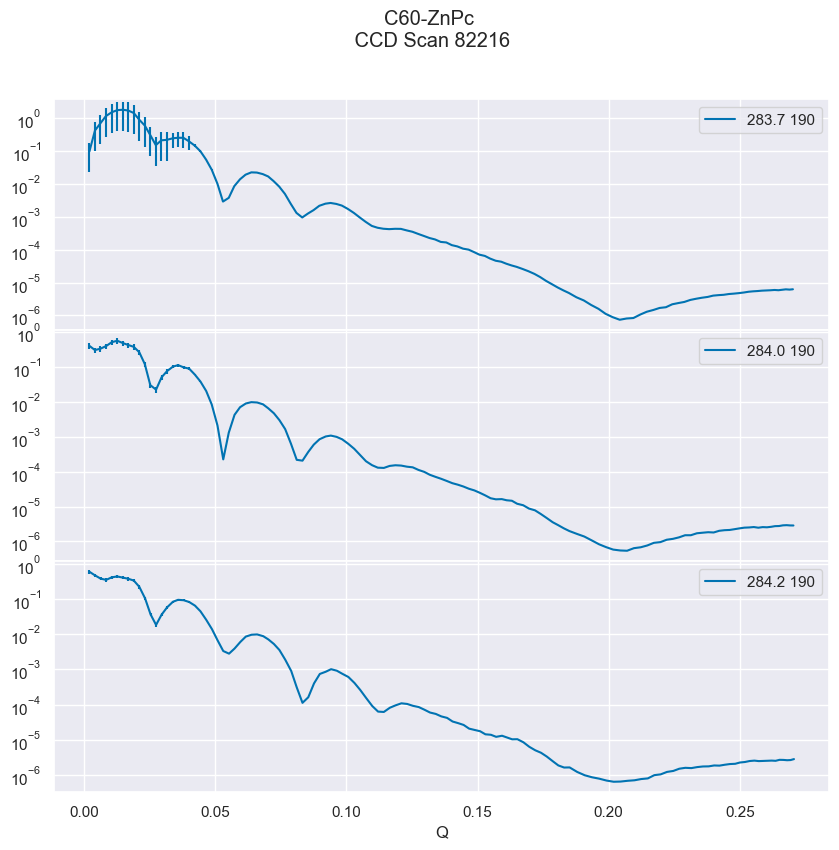

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

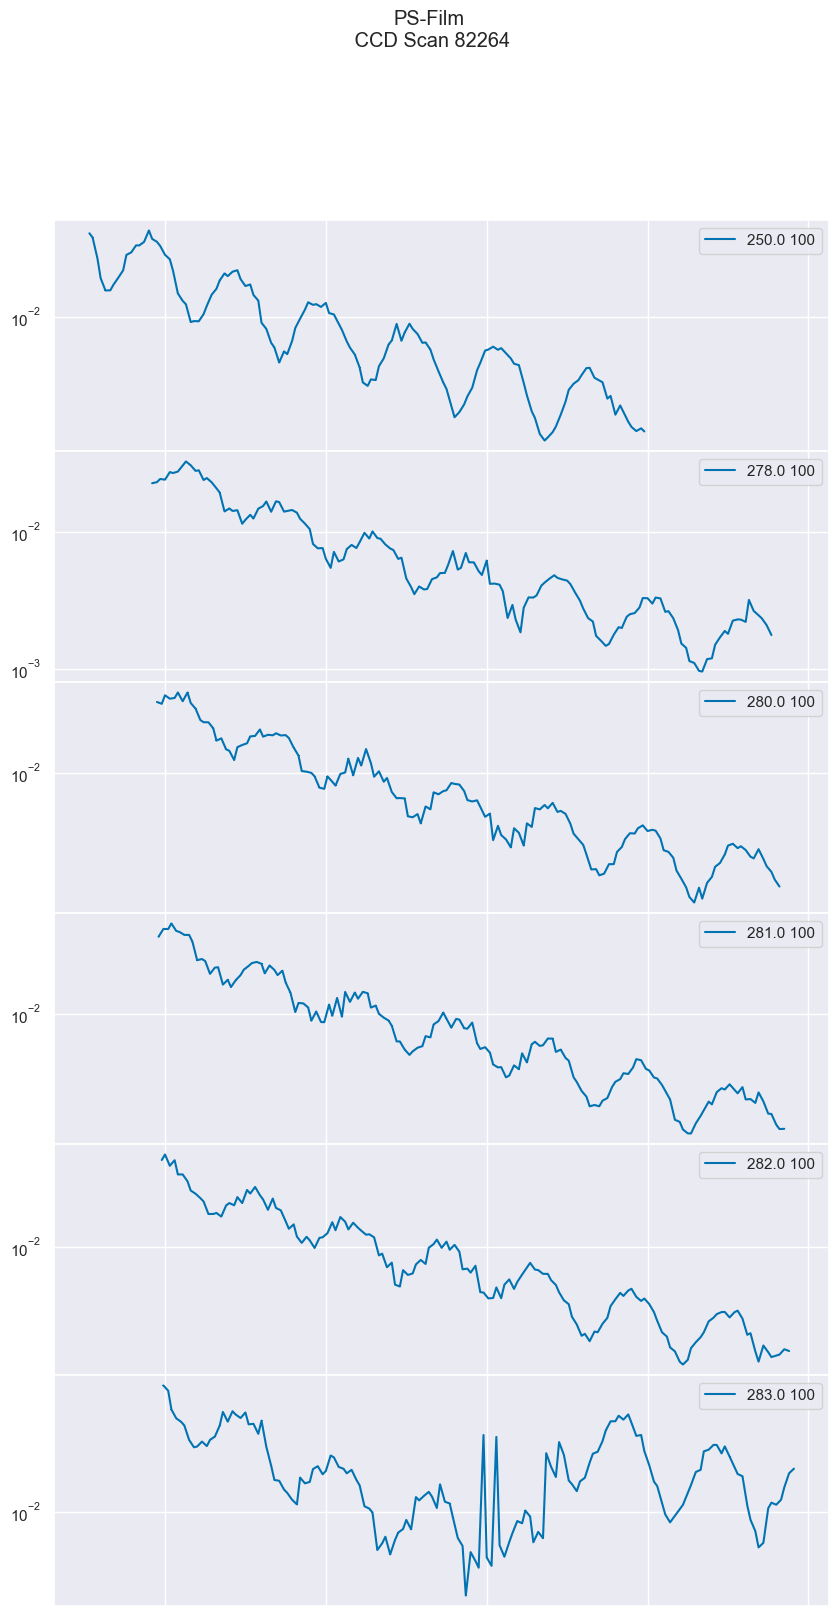

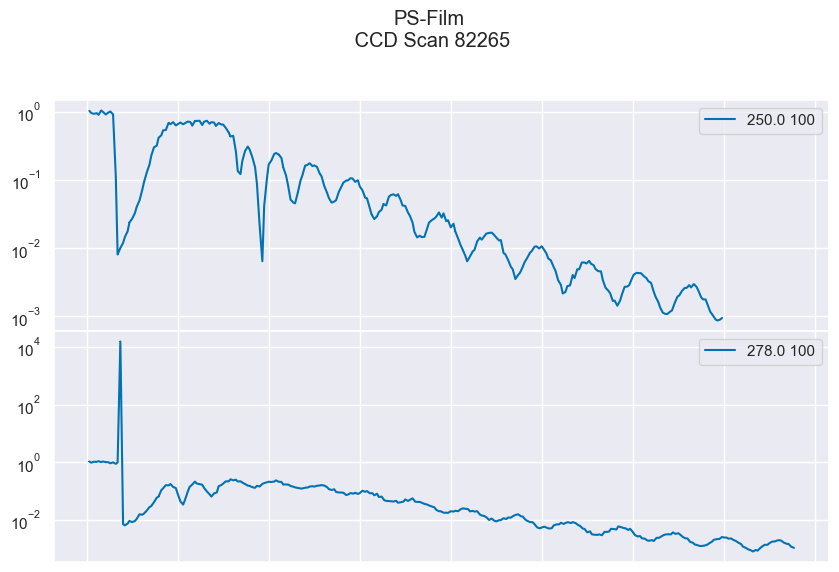

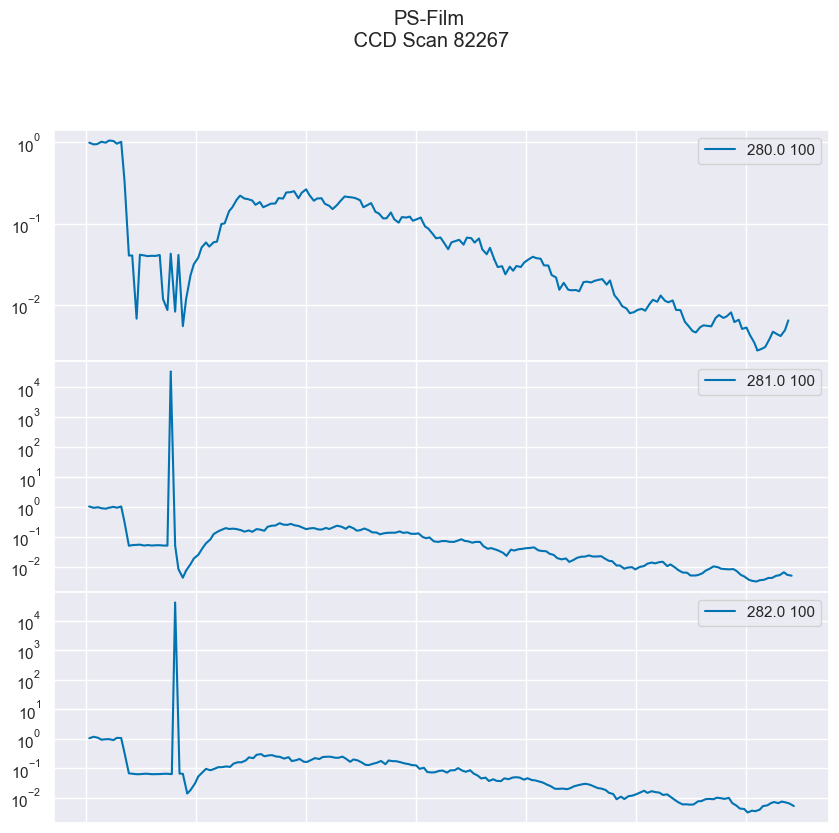

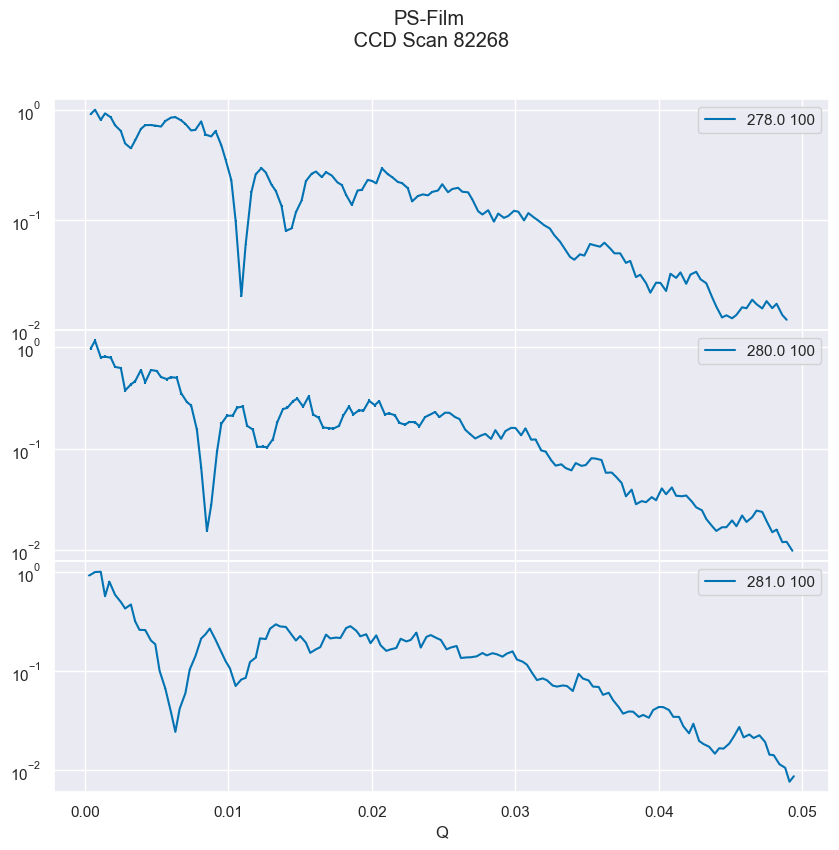

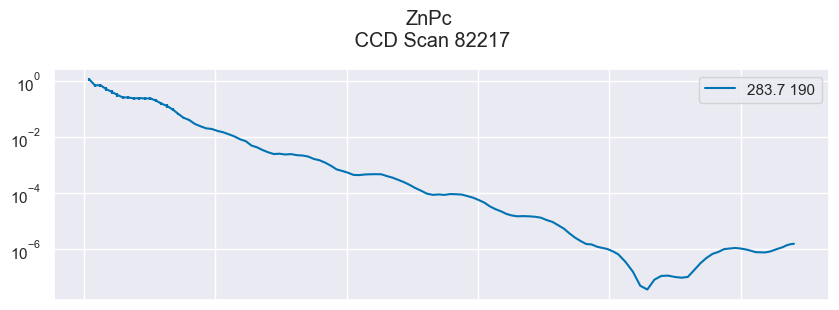

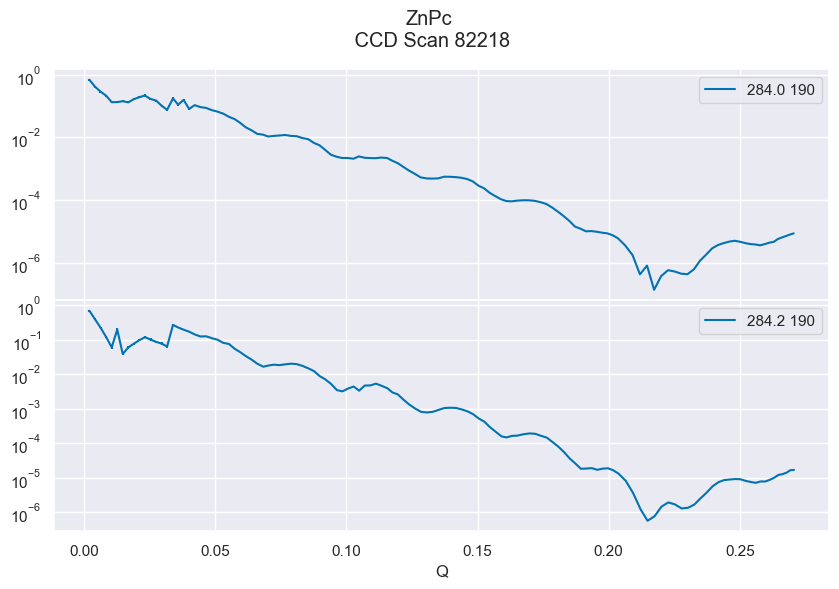

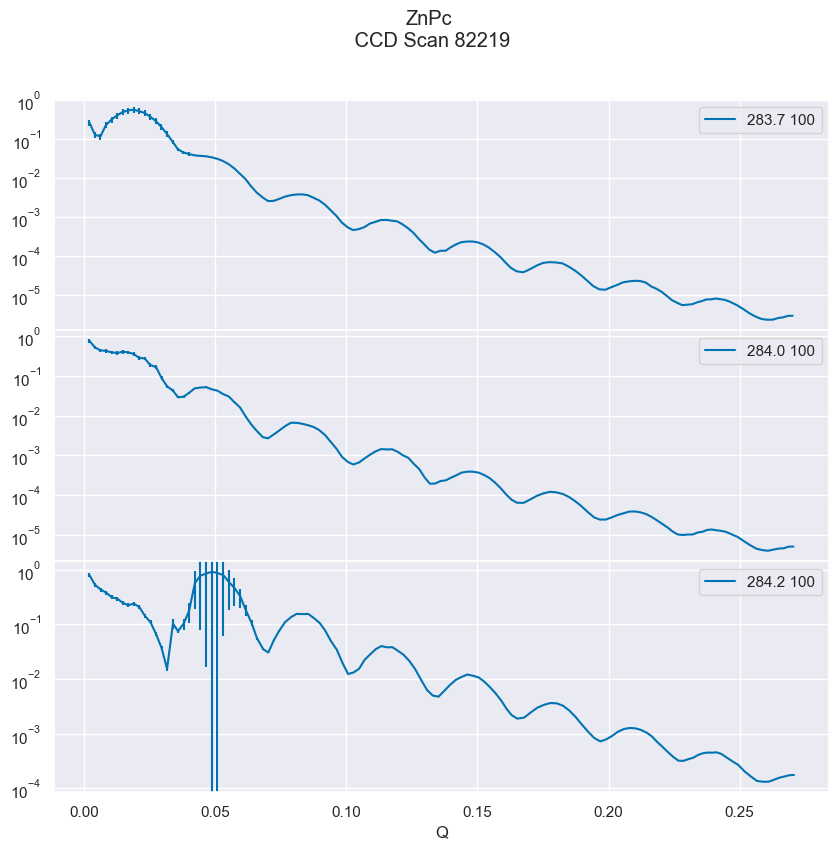

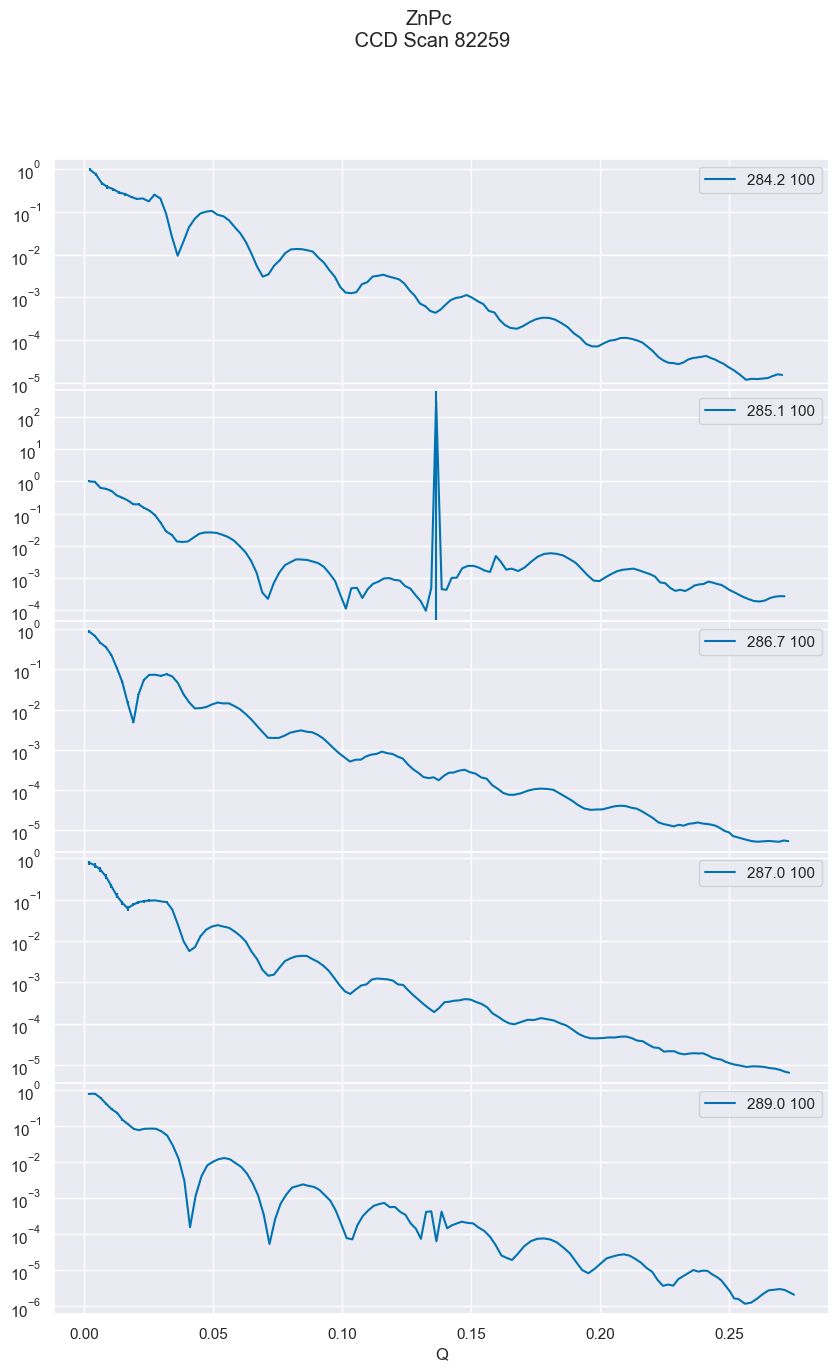

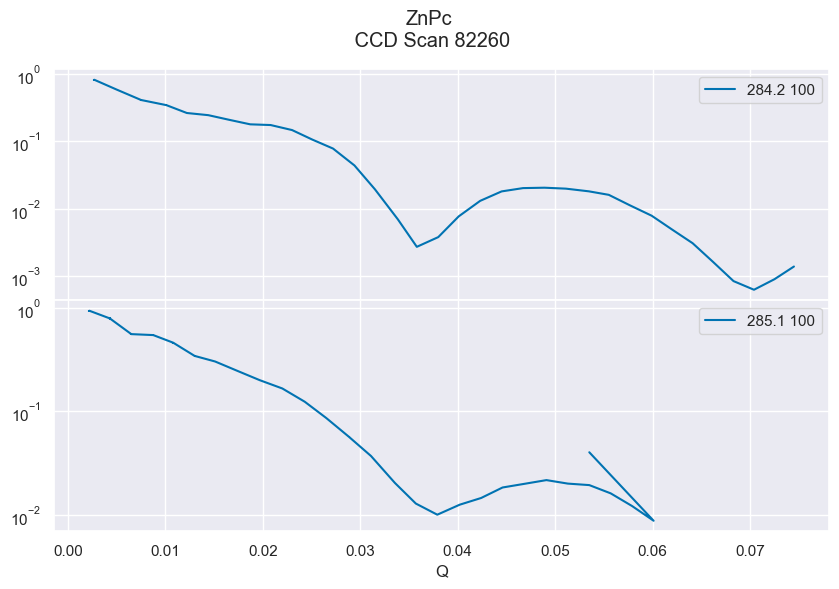

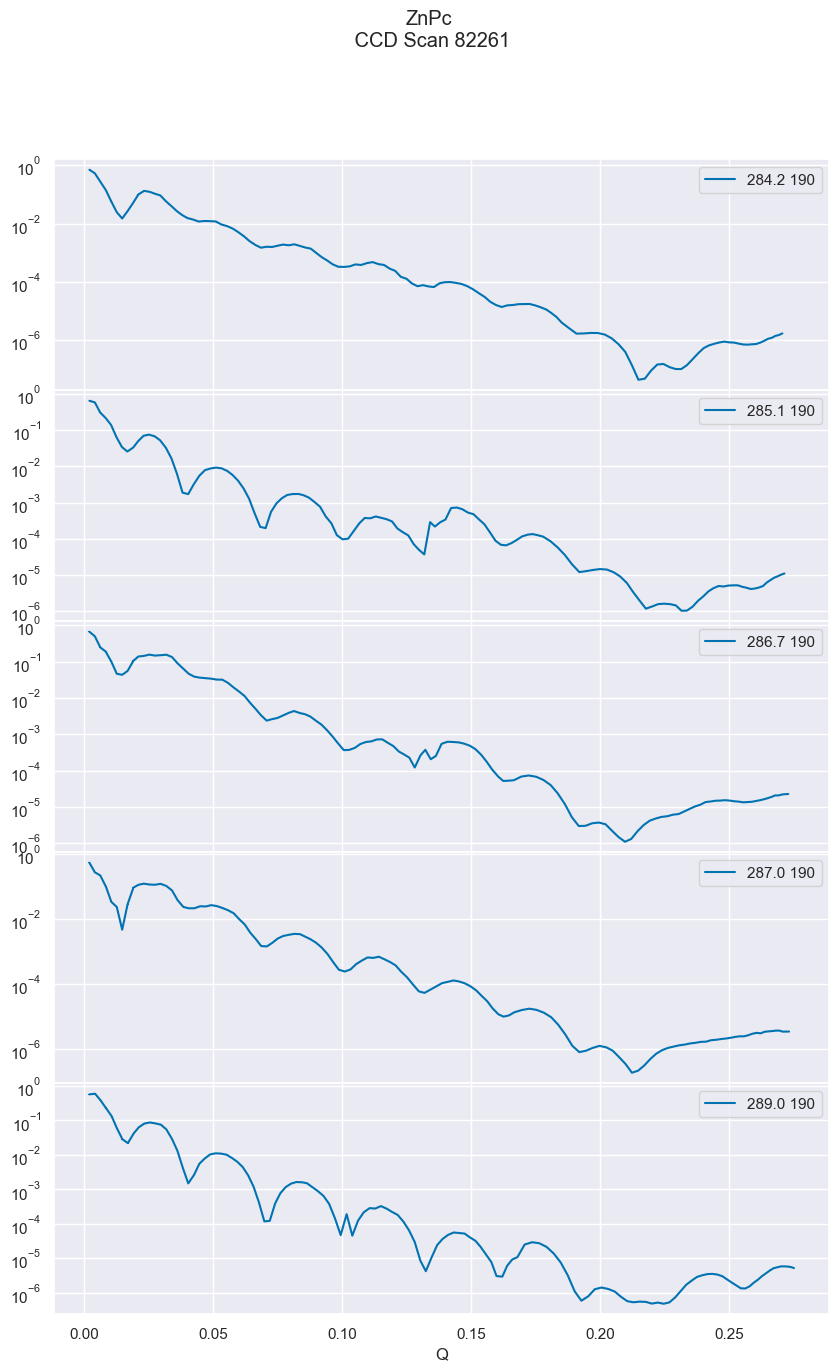

In [23]:
def plot_sample(sample_path):
    for scan in sample_path.iterdir():
        if not scan.is_dir():
            continue
        energies = [en for en in scan.iterdir() if en.is_dir()]
        fig, ax = plt.subplots(
            nrows=len(energies),
            figsize=(10, 3 * len(energies)),
            sharex=True,
            gridspec_kw={"wspace": 0, "hspace": 0},
        )
        fig.suptitle(f"{sample_path.stem}\n {scan.stem}")
        for i, en in enumerate(energies):
            if not en.is_dir():
                continue
            for pol in en.iterdir():
                if not pol.is_dir():
                    continue
                if isinstance(ax, np.ndarray):
                    axes = ax[i]
                else:
                    axes = ax
                try:
                    xrr = ru.Refl(path=pol)
                    xrr.plot(ax=axes, label=f"{en.name} {pol.stem}")
                    xrr.to_parquet()
                    xrr.to_csv()
                except Exception as e:
                    print(f"Error plotting {sample_path.stem} {en.name} {pol.stem}")
                    axes.remove()


import warnings

warnings.filterwarnings("ignore")


# FILEPATH: /c:/Users/Harlan Heilman/CarbonLab/Refl-Utils/src/RoomTempFitting.ipynb
def plot_bt():
    processed_path = ru.FileDialog.getDirectory(title="Select Processed Directory")
    samples = [s for s in processed_path.iterdir() if s.is_dir()]
    for sample in samples:
        plot_sample(sample)


plot_bt()